# RentSafeTO: Predicting Building Evaluation with Machine Learning
<br>
<div style="text-align: right"> 
Author: Hyunjung Kim<br>
Date: August 4, 2023
</div>

**Introduction:**

Welcome to our RentSafeTO project! In this capstone, we aim to predict the safety assessment of apartment buildings in Toronto using machine learning. Our goal is to provide valuable insights to both tenants and prospective property owners, empowering them to make informed decisions about housing safety.

**The Big Idea:**

RentSafeTO revolves around analyzing factors that influence building safety. By considering variables such as building height, construction year, population density, laundry facilities, and waste disposal, our predictive model aims to forecast the safety evaluation outcomes.

**The Impact:**

The impact of RentSafeTO extends to multiple stakeholders. Prospective property buyers can benefit from a risk assessment before purchasing an apartment building. Tenants planning to move can access safety information to choose safer living environments. Landlords can proactively address safety concerns, leading to a more secure rental market.

**The Data:**

Our project utilizes data from the Toronto open data site, encompassing various apartment building evaluations. By analyzing this dataset, we aim to uncover patterns and correlations, enabling our predictive model to make accurate safety assessments.


In [67]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Read Data
df = pd.read_csv('../data/Apartment Building Evaluation.csv')

In [69]:
# Sanity Check
df.head()

,_id,RSN,YEAR_REGISTERED,YEAR_EVALUATED,YEAR_BUILT,PROPERTY_TYPE,WARD,WARDNAME,SITE_ADDRESS,CONFIRMED_STOREYS,...,EXTERIOR_WALKWAYS,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA,OTHER_FACILITIES,GRID,LATITUDE,LONGITUDE,X,Y
0,4167486,4304347,NaN,NaN,1999.0,PRIVATE,2,Etobicoke Centre,** CREATED IN ERROR ** 399 THE WEST MALL,22,...,5.0,5.0,5.0,5.0,5.0,W0233,43.643781,-79.565456,299503.625,4833538.964
1,4167487,5157421,2023.0,NaN,1973.0,TCHC,17,Don Valley North,6 TREE SPARROWAY,4,...,3.0,5.0,4.0,3.0,4.0,N1721,43.791384,-79.369630,315272.148,4849932.515
2,4167488,5156814,2023.0,NaN,1973.0,TCHC,17,Don Valley North,13 FIELD SPARROWAY,4,...,4.0,5.0,4.0,3.0,4.0,N1721,43.790920,-79.368771,315334.815,4849906.373
3,4167489,5157387,2023.0,NaN,1973.0,TCHC,17,Don Valley North,4 TREE SPARROWAY,4,...,3.0,5.0,4.0,3.0,4.0,N1721,43.791448,-79.369332,315291.755,4849938.162
4,4167490,5156871,2023.0,NaN,1973.0,TCHC,17,Don Valley North,2 TREE SPARROWAY,4,...,5.0,5.0,4.0,3.0,4.0,N1721,43.791511,-79.369045,315330.308,4849947.465



**Data Cleaning (Summary):**

1. The dataset consists of 11,760 rows and 40 columns.
2. There are no duplicate rows, but some columns contain duplicated information.
3. Duplicate columns were removed during the data cleaning process.

In [12]:
df.shape

(11760, 40)

In this dataset, we have 11760 rows and 40 coulumns. 

In [16]:
for i in df.columns:
    print
    print(i)

_id
RSN
YEAR_REGISTERED
YEAR_EVALUATED
YEAR_BUILT
PROPERTY_TYPE
WARD
WARDNAME
SITE_ADDRESS
CONFIRMED_STOREYS
CONFIRMED_UNITS
EVALUATION_COMPLETED_ON
SCORE
RESULTS_OF_SCORE
NO_OF_AREAS_EVALUATED
ENTRANCE_LOBBY
ENTRANCE_DOORS_WINDOWS
SECURITY
STAIRWELLS
LAUNDRY_ROOMS
INTERNAL_GUARDS_HANDRAILS
GARBAGE_CHUTE_ROOMS
GARBAGE_BIN_STORAGE_AREA
ELEVATORS
STORAGE_AREAS_LOCKERS
INTERIOR_WALL_CEILING_FLOOR
INTERIOR_LIGHTING_LEVELS
GRAFFITI
EXTERIOR_CLADDING
EXTERIOR_GROUNDS
EXTERIOR_WALKWAYS
BALCONY_GUARDS
WATER_PEN_EXT_BLDG_ELEMENTS
PARKING_AREA
OTHER_FACILITIES
GRID
LATITUDE
LONGITUDE
X
Y


**And there is not duplicated row each one as unique.**

In [17]:
df.duplicated().sum()

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          11760 non-null  int64  
 1   RSN                          11760 non-null  int64  
 2   YEAR_REGISTERED              11455 non-null  float64
 3   YEAR_EVALUATED               9751 non-null   float64
 4   YEAR_BUILT                   11714 non-null  float64
 5   PROPERTY_TYPE                11760 non-null  object 
 6   WARD                         11760 non-null  int64  
 7   WARDNAME                     11760 non-null  object 
 8   SITE_ADDRESS                 11760 non-null  object 
 9   CONFIRMED_STOREYS            11760 non-null  int64  
 10  CONFIRMED_UNITS              11760 non-null  int64  
 11  EVALUATION_COMPLETED_ON      11760 non-null  object 
 12  SCORE                        11760 non-null  int64  
 13  RESULTS_OF_SCORE

**Most of the columns are scored from 1 to 5. This means that the columns with scores are the main sources used for judgment.**

In [32]:
for i in df.columns:
    print('number of distinct in', i)
    print(':', df[i].nunique())
        

number of distinct in _id
: 11760
number of distinct in RSN
: 3513
number of distinct in YEAR_REGISTERED
: 7
number of distinct in YEAR_EVALUATED
: 5
number of distinct in YEAR_BUILT
: 130
number of distinct in PROPERTY_TYPE
: 3
number of distinct in WARD
: 25
number of distinct in WARDNAME
: 25
number of distinct in SITE_ADDRESS
: 3513
number of distinct in CONFIRMED_STOREYS
: 40
number of distinct in CONFIRMED_UNITS
: 383
number of distinct in EVALUATION_COMPLETED_ON
: 564
number of distinct in SCORE
: 66
number of distinct in RESULTS_OF_SCORE
: 4
number of distinct in NO_OF_AREAS_EVALUATED
: 11
number of distinct in ENTRANCE_LOBBY
: 5
number of distinct in ENTRANCE_DOORS_WINDOWS
: 5
number of distinct in SECURITY
: 5
number of distinct in STAIRWELLS
: 5
number of distinct in LAUNDRY_ROOMS
: 5
number of distinct in INTERNAL_GUARDS_HANDRAILS
: 5
number of distinct in GARBAGE_CHUTE_ROOMS
: 5
number of distinct in GARBAGE_BIN_STORAGE_AREA
: 5
number of distinct in ELEVATORS
: 5
number o

**_id, RSN, LATITUDE, LATITUDE, X, and Y are not the columns for analysis, but for identification. So, we don't need to see as plots.**

In [32]:
plot_list = df.columns[2:-4]
plot_list

no_target_list = df[plot_list].drop(columns=['SCORE',
       'RESULTS_OF_SCORE'])

In [7]:
# plots of the scored columns

#  for i in plot_list:
#     if df[i].nunique() <= 66 :
#         plt.figure()
#         plt.title(i)
#         df[i].value_counts().plot.bar()
#         plt.show()

There are several type of columns. Most of the columns are expressed as scores from 1 to 5.

<5 scores columns - 20ea><br>
ENTRANCE_LOBBY<br>
ENTRANCE_DOORS_WINDOWS<br>
SECURITY<br>
STAIRWELLS<br>
LAUNDRY_ROOMS<br>
INTERNAL_GUARDS_HANDRAILS<br>
GARBAGE_CHUTE_ROOMS<br>
GARBAGE_BIN_STORAGE_AREA<br>
ELEVATORS<br>
STORAGE_AREAS_LOCKERS<br>
INTERIOR_WALL_CEILING_FLOOR<br>
INTERIOR_LIGHTING_LEVELS<br>
GRAFFITI<br>
EXTERIOR_CLADDING<br>
EXTERIOR_GROUNDS<br>
EXTERIOR_WALKWAYS<br>
BALCONY_GUARDS<br>
WATER_PEN_EXT_BLDG_ELEMENTS<br>
PARKING_AREA<br>
OTHER_FACILITIES<br>


As you can see, we can see that we have 17% of null in 'YEAR_EVALUATED' however the year of this columns is presented in 'EVALUATION_COMPLETED_ON'. 

It mean we can drop this column because we have accurate date column than year.

In [6]:
df.isna().sum()/df.shape[0]*100

_id                             0.000000
RSN                             0.000000
YEAR_REGISTERED                 2.593537
YEAR_EVALUATED                 17.083333
YEAR_BUILT                      0.391156
PROPERTY_TYPE                   0.000000
WARD                            0.000000
WARDNAME                        0.000000
SITE_ADDRESS                    0.000000
CONFIRMED_STOREYS               0.000000
CONFIRMED_UNITS                 0.000000
EVALUATION_COMPLETED_ON         0.000000
SCORE                           0.000000
RESULTS_OF_SCORE                0.000000
NO_OF_AREAS_EVALUATED           0.000000
ENTRANCE_LOBBY                  0.017007
ENTRANCE_DOORS_WINDOWS          0.008503
SECURITY                        0.051020
STAIRWELLS                      0.025510
LAUNDRY_ROOMS                   5.578231
INTERNAL_GUARDS_HANDRAILS       0.025510
GARBAGE_CHUTE_ROOMS            56.615646
GARBAGE_BIN_STORAGE_AREA        0.093537
ELEVATORS                      41.352041
STORAGE_AREAS_LO

In [10]:
df_scored = df[['ENTRANCE_LOBBY',
'ENTRANCE_DOORS_WINDOWS',
'SECURITY',
'STAIRWELLS',
'LAUNDRY_ROOMS',
'INTERNAL_GUARDS_HANDRAILS',
'GARBAGE_CHUTE_ROOMS',
'GARBAGE_BIN_STORAGE_AREA',
'ELEVATORS',
'STORAGE_AREAS_LOCKERS',
'INTERIOR_WALL_CEILING_FLOOR',
'INTERIOR_LIGHTING_LEVELS',
'GRAFFITI',
'EXTERIOR_CLADDING',
'EXTERIOR_GROUNDS',
'EXTERIOR_WALKWAYS',
'BALCONY_GUARDS',
'WATER_PEN_EXT_BLDG_ELEMENTS',
'PARKING_AREA',
'OTHER_FACILITIES']]

In [15]:
df_scored.isna().sum()/df_scored.shape[0]*100

ENTRANCE_LOBBY                  0.017007
ENTRANCE_DOORS_WINDOWS          0.008503
SECURITY                        0.051020
STAIRWELLS                      0.025510
LAUNDRY_ROOMS                   5.578231
INTERNAL_GUARDS_HANDRAILS       0.025510
GARBAGE_CHUTE_ROOMS            56.615646
GARBAGE_BIN_STORAGE_AREA        0.093537
ELEVATORS                      41.352041
STORAGE_AREAS_LOCKERS          59.413265
INTERIOR_WALL_CEILING_FLOOR     0.017007
INTERIOR_LIGHTING_LEVELS        0.017007
GRAFFITI                        0.331633
EXTERIOR_CLADDING               0.076531
EXTERIOR_GROUNDS                0.127551
EXTERIOR_WALKWAYS               0.051020
BALCONY_GUARDS                 32.202381
WATER_PEN_EXT_BLDG_ELEMENTS     0.051020
PARKING_AREA                    8.979592
OTHER_FACILITIES               80.833333
dtype: float64

As we mentioned before, 'YEAR_EVALUATED','X',and 'Y' columns represent same informations. So, I will drop those.

In [22]:
df_clean = df.drop(['YEAR_EVALUATED','X','Y'], axis=1)

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          11760 non-null  int64  
 1   RSN                          11760 non-null  int64  
 2   YEAR_REGISTERED              11455 non-null  float64
 3   YEAR_BUILT                   11714 non-null  float64
 4   PROPERTY_TYPE                11760 non-null  object 
 5   WARD                         11760 non-null  int64  
 6   WARDNAME                     11760 non-null  object 
 7   SITE_ADDRESS                 11760 non-null  object 
 8   CONFIRMED_STOREYS            11760 non-null  int64  
 9   CONFIRMED_UNITS              11760 non-null  int64  
 10  EVALUATION_COMPLETED_ON      11760 non-null  object 
 11  SCORE                        11760 non-null  int64  
 12  RESULTS_OF_SCORE             11760 non-null  object 
 13  NO_OF_AREAS_EVAL

In [26]:
df_scored.describe()

,ENTRANCE_LOBBY,ENTRANCE_DOORS_WINDOWS,SECURITY,STAIRWELLS,LAUNDRY_ROOMS,INTERNAL_GUARDS_HANDRAILS,GARBAGE_CHUTE_ROOMS,GARBAGE_BIN_STORAGE_AREA,ELEVATORS,STORAGE_AREAS_LOCKERS,INTERIOR_WALL_CEILING_FLOOR,INTERIOR_LIGHTING_LEVELS,GRAFFITI,EXTERIOR_CLADDING,EXTERIOR_GROUNDS,EXTERIOR_WALKWAYS,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA,OTHER_FACILITIES
count,11758.000000,11759.000000,11754.000000,11757.000000,11104.000000,11757.000000,5102.000000,11749.000000,6897.000000,4773.000000,11758.000000,11758.000000,11721.000000,11751.000000,11745.000000,11754.000000,7973.000000,11754.000000,10704.000000,2254.000000
mean,3.713642,3.675313,4.126425,3.453857,3.575919,3.603640,3.567229,3.607201,3.838336,3.621412,3.492686,3.672393,4.610869,3.549060,3.650575,3.643866,3.752665,3.668453,3.392096,4.019521
std,0.775948,0.770057,0.877997,0.787374,0.794015,0.830116,0.840837,0.782764,0.808053,0.787966,0.767906,0.878231,0.755874,0.718478,0.754074,0.744887,0.833194,0.739714,0.757125,0.795332
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Most of scores are over 3, but we should care the scores under 3 because we should find an environment where we get low scores, result is the audit.

In [30]:
import seaborn as sns

/var/folders/36/xfgzdwrx6110n96y2pltdng00000gn/T/ipykernel_27832/318798300.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = no_target_list.corr(), annot=True,


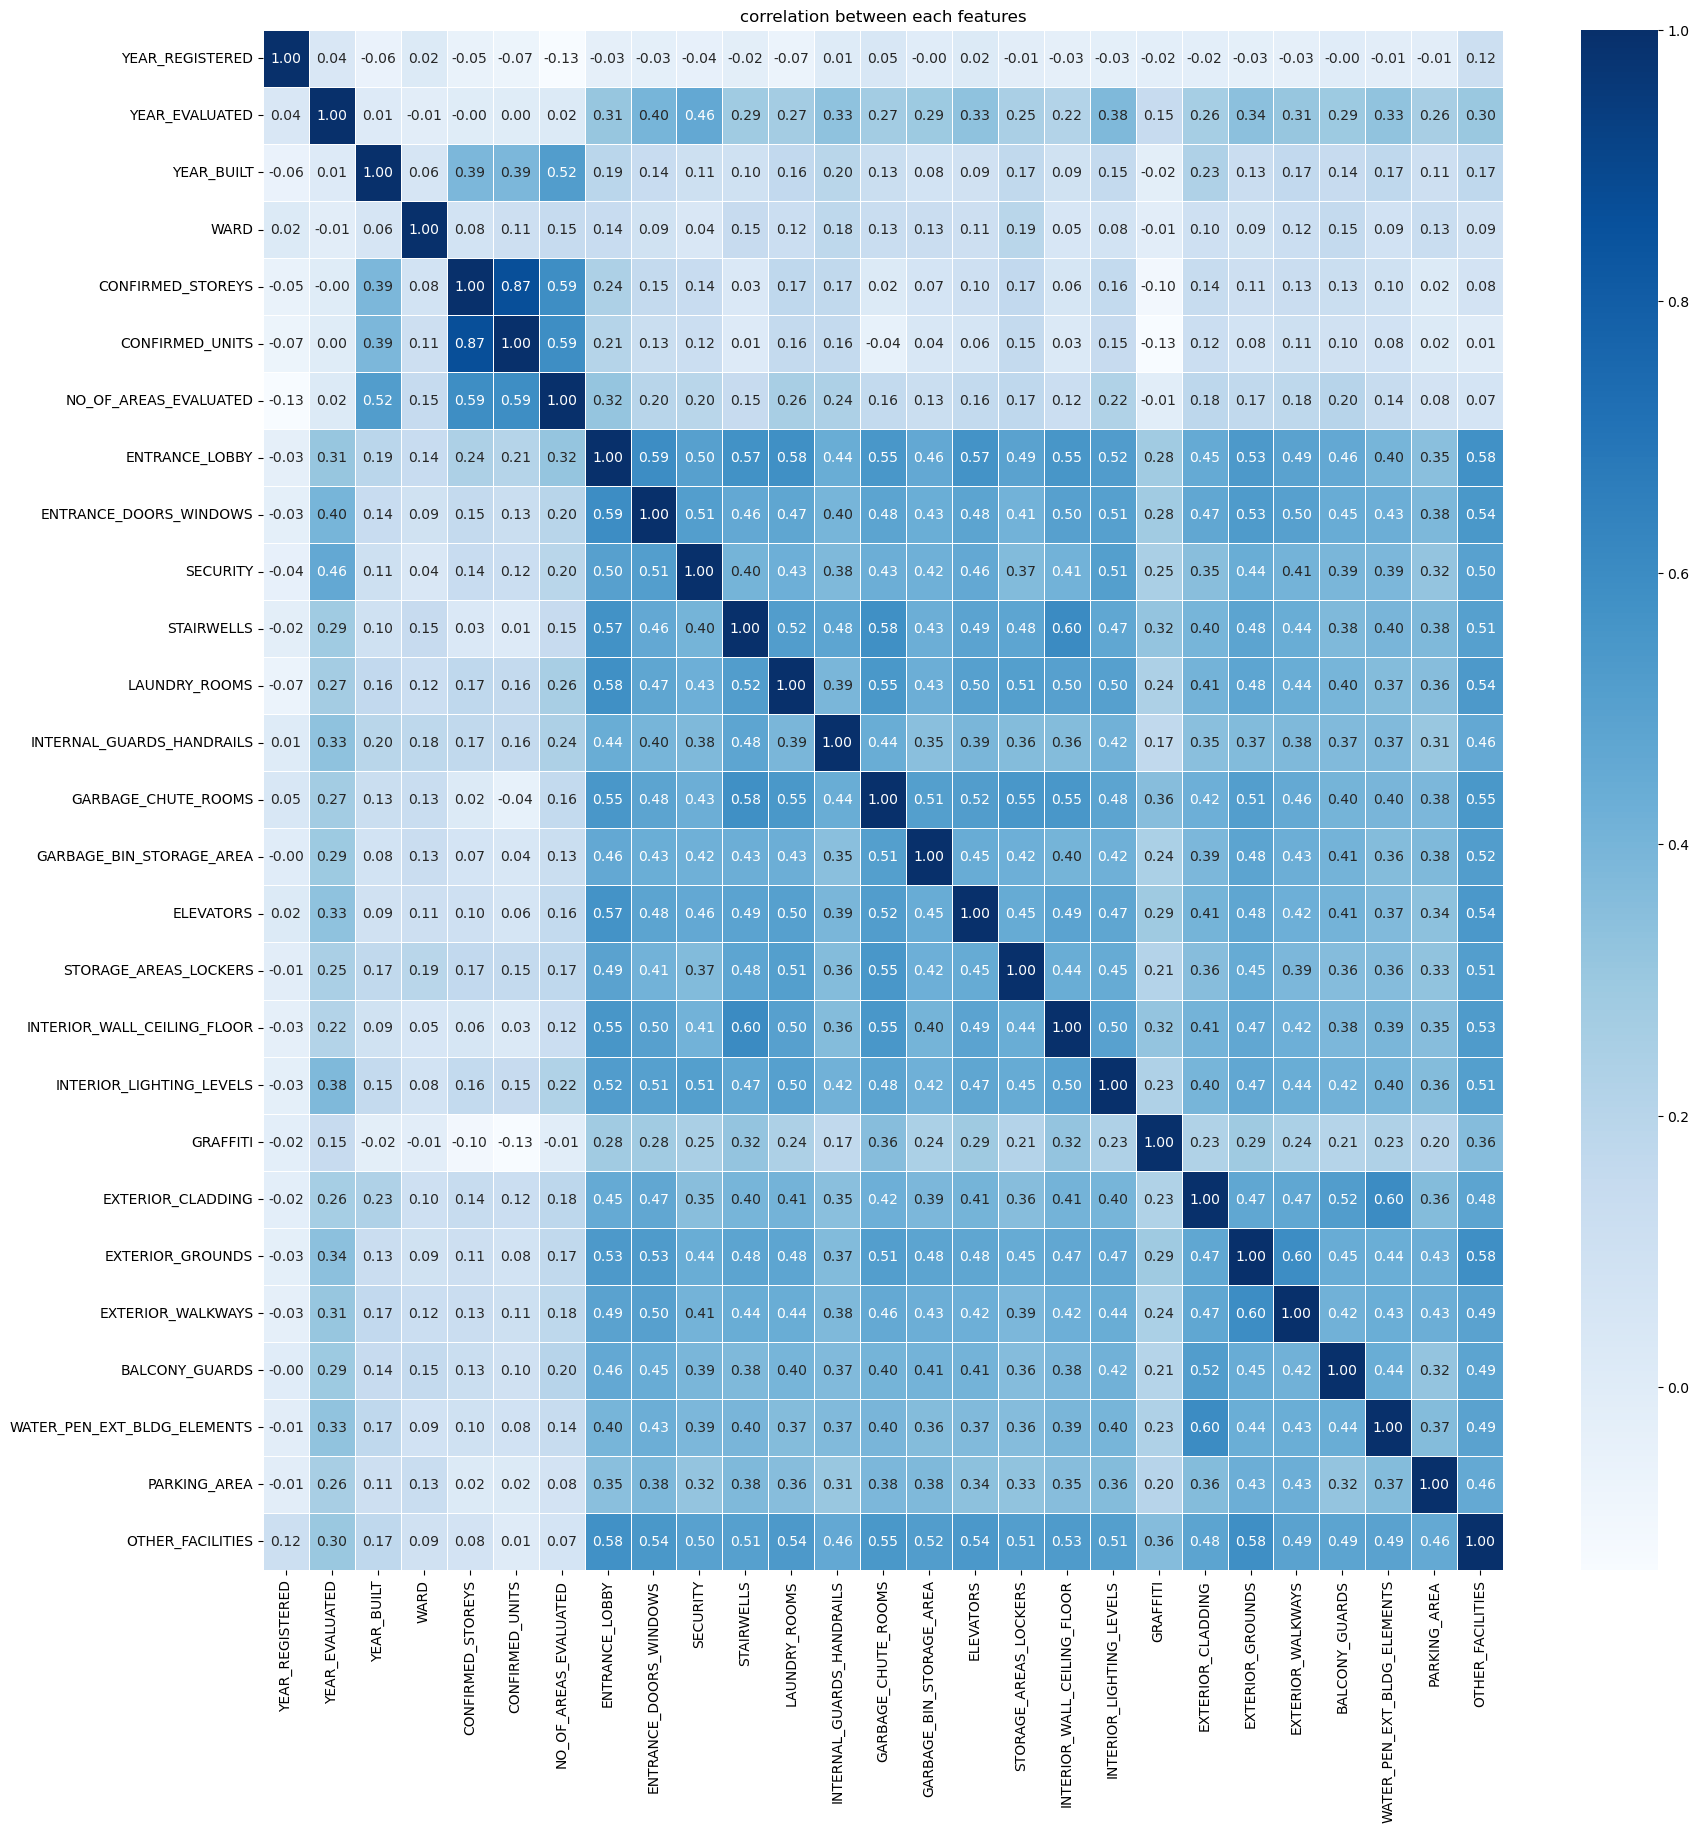

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(data = no_target_list.corr(), annot=True,
           fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('correlation between each features')
plt.savefig('hyunjung_corr_heatmap.png')

1. Let's look at the relationship between the year the building was built and the results.

Before start calculating we saw that 'YEAR_BUILT' column has 2.593537% null. To make it more accurate, I will use a deleted missing values.

In [46]:
temp_1 = df.loc[:,['YEAR_BUILT','SCORE']]

In [64]:
temp_1

,YEAR_BUILT,SCORE
0,1999.0,100
1,1973.0,83
2,1973.0,81
3,1973.0,79
4,1973.0,76
...,...,...
11755,1955.0,70
11756,1966.0,66
11757,1940.0,76
11758,1965.0,76


In [54]:
temp_1.isna().sum()
temp_1 = temp_1.dropna(axis=0)

X = temp_1['YEAR_BUILT']
y = temp_1['SCORE']

In [55]:
np.cov(X,y)

array([[358.09827384,  38.96072044],
       [ 38.96072044, 111.33885281]])

In [58]:
temp_1.corr()

,YEAR_BUILT,SCORE
YEAR_BUILT,1.00000,0.19512
SCORE,0.19512,1.00000


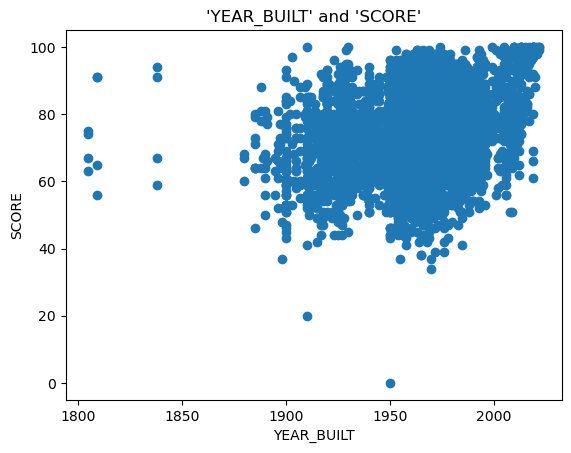

In [60]:
#1 
plt.figure()
plt.scatter(X, y)
plt.title("'YEAR_BUILT' and 'SCORE'")
plt.xlabel("YEAR_BUILT")
plt.ylabel("SCORE")
plt.show()

In [63]:
from scipy import stats
import statsmodels.api as sm

stats.pearsonr(X,y)

PearsonRResult(statistic=0.19512031758396897, pvalue=7.234578143231639e-101)

1. Cleaning: missing values, duplicated data, data types. If you decide drop any column here because has a lot nulls, then explain why is had to compute the missing data and drop it.
2. EDA: Explore your target, plot your target, exploring numerical and categorical columns, plot the distributions numerical - histograms and categorical bar graphs. 
- Explore possible relations among your columns, you can check relation between your predictor to avoid multicolinearity, also you can check the correlation between your target and your predictors. In this part you can apply some test like pearson or chi2 depending on the case. 
4. Preprocessing: try to convert your categorical columns into numerical columns. At the end of this step you should have one dataframe with all of your predictor in numerical format. Use one hot encoding, labeling, binarize the columns, according each case. Doing this step maybe you can decide drop some columns by your criteria. finishing this step your dataframe is ready for modeling.
3. modeling: start with LINEAR REG MODEL using all of your predictors. subsequently you can try other models, or different sets of data... 